In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [8]:
# Input variables
d = ctrl.Antecedent(np.arange(0, 101, 1), 'd')         # range [m]
a = ctrl.Antecedent(np.arange(10, 81, 1), 'a')         # angle [deg]
k = ctrl.Antecedent(np.arange(0, 0.51, 0.01), 'k')     # air resistance coefficient
m = ctrl.Antecedent(np.arange(0.1, 5.1, 0.1), 'm')     # mass [kg]

# Output variable
v0 = ctrl.Consequent(np.arange(0, 51, 1), 'v0')        # initial velocity [m/s]

In [11]:
fuzz.trimf(d.universe, [0, 0, 30]) # triangular membership function for d

array([1.        , 0.96666667, 0.93333333, 0.9       , 0.86666667,
       0.83333333, 0.8       , 0.76666667, 0.73333333, 0.7       ,
       0.66666667, 0.63333333, 0.6       , 0.56666667, 0.53333333,
       0.5       , 0.46666667, 0.43333333, 0.4       , 0.36666667,
       0.33333333, 0.3       , 0.26666667, 0.23333333, 0.2       ,
       0.16666667, 0.13333333, 0.1       , 0.06666667, 0.03333333,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [35]:
# Membership functions
d['small'] = fuzz.trimf(d.universe, [0, 0, 30])
d['medium'] = fuzz.trimf(d.universe, [20, 50, 80])
d['large'] = fuzz.trimf(d.universe, [60, 100, 100])

a['low'] = fuzz.trimf(a.universe, [10, 10, 30])
a['medium'] = fuzz.trimf(a.universe, [20, 45, 70])
a['high'] = fuzz.trimf(a.universe, [60, 80, 80])

k['small'] = fuzz.trimf(k.universe, [0, 0, 0.15])
k['medium'] = fuzz.trimf(k.universe, [0.1, 0.25, 0.4])
k['large'] = fuzz.trimf(k.universe, [0.3, 0.5, 0.5])

m['light'] = fuzz.trimf(m.universe, [0.1, 0.1, 1.5])
m['medium'] = fuzz.trimf(m.universe, [1, 2.5, 4])
m['heavy'] = fuzz.trimf(m.universe, [3, 5, 5])

v0['low'] = fuzz.trimf(v0.universe, [0, 0, 15])
v0['medium'] = fuzz.trimf(v0.universe, [10, 25, 40])
v0['high'] = fuzz.trimf(v0.universe, [30, 50, 50])

In [36]:
ctrl.Rule(d['small'] & a['medium'] & k['small'] & m['light'], v0['low'])

IF ((d[small] AND a[medium]) AND k[small]) AND m[light] THEN v0[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax

In [37]:
ctrl.Rule(d['medium'] & a['medium'] & k['medium'] & m['medium'], v0['medium'])

IF ((d[medium] AND a[medium]) AND k[medium]) AND m[medium] THEN v0[medium]
	AND aggregation function : fmin
	OR aggregation function  : fmax

In [38]:
# Fuzzy rules
rule1 = ctrl.Rule(d['small'] & a['medium'] & k['small'] & m['light'], v0['low'])
rule2 = ctrl.Rule(d['medium'] & a['medium'] & k['small'] & m['medium'], v0['medium'])
rule3 = ctrl.Rule(d['large'] & a['medium'] & k['small'] & m['heavy'], v0['high'])
rule4 = ctrl.Rule(d['large'] & a['high'] & k['large'] & m['light'], v0['high'])
rule5 = ctrl.Rule(d['small'] & a['low'] & k['large'] & m['light'], v0['medium'])
rule6 = ctrl.Rule(d['medium'] & a['medium'] & k['medium'] & m['medium'], v0['medium'])
rule7 = ctrl.Rule(d['large'] & a['low'] & k['small'] & m['medium'], v0['high'])
rule8 = ctrl.Rule(d['small'] & a['high'] & k['small'] & m['heavy'], v0['low'])
rule9 = ctrl.Rule(d['medium'] & a['medium'] & k['medium'] & m['medium'], v0['medium'])

In [39]:
v0_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9
])
v0_sim = ctrl.ControlSystemSimulation(v0_ctrl)

In [70]:
d_in = 80    # range [m] - medium
a_in = 25    # angle [deg] - medium
k_in = 0.05  # air resistance - small/medium
m_in = 2     # mass [kg] - medium

v0_sim.input['d'] = d_in
v0_sim.input['a'] = a_in
v0_sim.input['k'] = k_in
v0_sim.input['m'] = m_in

v0_sim.compute()

In [71]:
if 'v0' in v0_sim.output:
    print(f"Initial velocity (fuzzy model): {v0_sim.output['v0']:.2f} m/s")
else:
    print("No fuzzy output for these inputs. Try adjusting membership functions or rules.")

Initial velocity (fuzzy model): 41.19 m/s


In [72]:
# Analytical solution (no air resistance)
g = 9.81
a_rad = np.deg2rad(a_in)
v0_analytical = np.sqrt(d_in * g / np.sin(2 * a_rad))
print(f"Initial velocity (analytical, no air resistance): {v0_analytical:.2f} m/s")

Initial velocity (analytical, no air resistance): 32.01 m/s


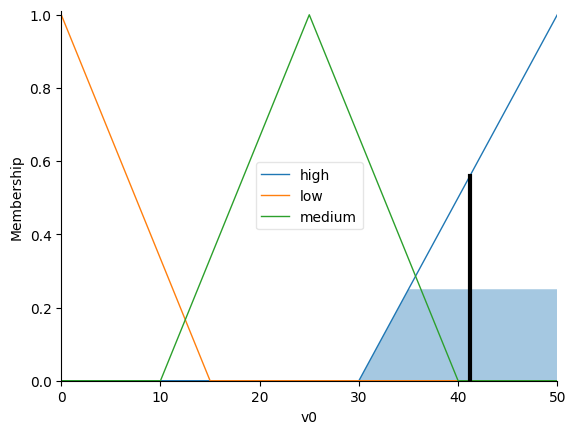

In [73]:
v0.view(sim=v0_sim)
plt.show()